In [1]:
print('hey, Scikit-learn!')


hey, Scikit-learn!


In [2]:
def mul(x,y):
    return x*y

mul(4,5)


20

In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
print(np)
#print(dir(np))
# np.array?
#print(help(np.array))
print(np.__version__)

<module 'numpy' from '/home/juan/.local/lib/python3.6/site-packages/numpy/__init__.py'>
1.17.0


In [3]:
# from kaggle use house.csv file
# sqft square feet ,敷地SHIKICHI area of the lot
df = pd.read_csv('house.csv')
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,7,1955,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,1951,1991
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,1933,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1965,0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1987,0


In [53]:
# rooms price and condition column first 50 rows
df[['price','condition']][0:50:2]
#df.iloc[:, 2:]  everything aside price and date

,price,condition
0,221900.0,3
2,180000.0,3
4,510000.0,3
6,257500.0,3
8,229500.0,3
10,662500.0,3
12,310000.0,4
14,530000.0,3
16,395000.0,3
18,189000.0,4


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
date            2000 non-null object
price           2000 non-null float64
bedrooms        2000 non-null int64
bathrooms       2000 non-null float64
sqft_living     2000 non-null int64
sqft_lot        2000 non-null int64
floors          2000 non-null float64
condition       2000 non-null int64
grade           2000 non-null int64
yr_built        2000 non-null int64
yr_renovated    2000 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 172.0+ KB


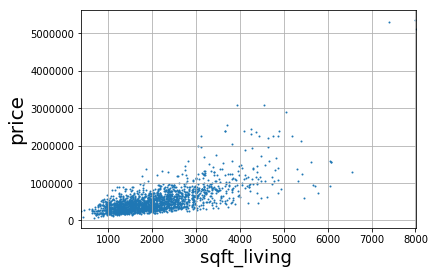

In [6]:
#家の大きさと価格の関係　散布図
plt.scatter(df['sqft_living'], df['price'], s=1)
plt.xlabel('sqft_living ', size = 18)
plt.ylabel('price', size= 20)
plt.grid(True)
plt.xlim(df.sqft_living.min(),df.sqft_living.max())
plt.show() #出力

# plt.hist for histogram

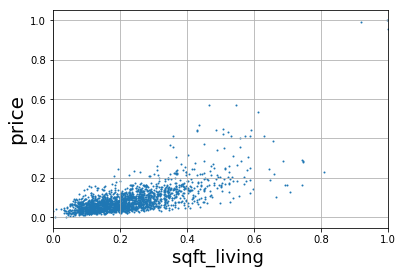

In [7]:
#normalized graph
df = pd.read_csv('house.csv')
def min_max(v, df):
    min = np.min(df)
    max = np.max(df)
    result= (df[v]-min)/(max-min)
    return result

sqmin = np.array([min_max(i,df.sqft_living) for i in range(len(df.sqft_living))])
pricemin = np.array([min_max(i,df.price) for i in range(len(df.price))])

plt.scatter(sqmin, pricemin, s=1)
plt.xlabel('sqft_living ', size = 18)
plt.ylabel('price', size= 20)
plt.grid(True)
plt.xlim(sqmin.min(),sqmin.max())
plt.show() #出力


In [8]:
# 学習用データとテストデータへの分類  First method
from sklearn.model_selection import train_test_split

# 75%学習用、　25％検証用
train_df, test_df = train_test_split(df)

In [9]:

train_X = train_df[['sqft_lot', 'floors', 'condition', 'yr_built', 'yr_renovated']].values
train_Y = train_df['price'].values
test_X = test_df[['sqft_lot', 'floors', 'condition', 'yr_built', 'yr_renovated']].values
test_Y = test_df['price'].values

print(train_X)

[[1.2138e+04 1.0000e+00 3.0000e+00 1.9680e+03 0.0000e+00]
 [6.8040e+03 1.0000e+00 3.0000e+00 1.9490e+03 0.0000e+00]
 [1.2500e+04 1.5000e+00 3.0000e+00 1.9540e+03 0.0000e+00]
 ...
 [4.6940e+03 2.0000e+00 3.0000e+00 2.0050e+03 0.0000e+00]
 [1.0320e+04 1.0000e+00 4.0000e+00 1.9630e+03 0.0000e+00]
 [1.7380e+04 1.0000e+00 4.0000e+00 1.9700e+03 0.0000e+00]]


In [10]:
#回帰分析 regression analysis
# 取得したデータから未来のデータを予測する
#　説明変数（学習）目的変数　　同じモデルでで予測

#線形回帰、　最小二乗回　過学習を起こしやすい
# 過学習の代わりlassoとRidge
#lasso 正則化の概念　l1 norm drop useless parameters (dimension) ||
#Ridge 正則化の概念　l2 norm prevents overtraining  sqrt()

#学習用データとテスト用データへの分割
from sklearn.model_selection import train_test_split

X_lim = df[['sqft_lot','floors','condition', 'yr_built', 'yr_renovated']].values 
# values でnumpy 配列にする
Y_lim =  df['price'].values

#75%学習用、25検証用にランダム分割 split 75% learning, 25% testing  predict Y_lim
train_X_lim, test_X_lim, train_Y_lim, test_Y_lim = train_test_split(X_lim, Y_lim,test_size=0.25, shuffle=True, random_state=0)



print(X_lim)
print(Y_lim)

[[5.6500e+03 1.0000e+00 3.0000e+00 1.9550e+03 0.0000e+00]
 [7.2420e+03 2.0000e+00 3.0000e+00 1.9510e+03 1.9910e+03]
 [1.0000e+04 1.0000e+00 3.0000e+00 1.9330e+03 0.0000e+00]
 ...
 [8.5810e+03 1.0000e+00 4.0000e+00 1.9200e+03 0.0000e+00]
 [1.3383e+04 1.0000e+00 3.0000e+00 1.9830e+03 0.0000e+00]
 [5.0000e+03 2.0000e+00 3.0000e+00 1.9790e+03 0.0000e+00]]
[221900. 538000. 180000. ... 180000. 465000. 650000.]


In [41]:
#データの全処理
from sklearn import linear_model

rgs1 = linear_model.LinearRegression()
rgs1.fit(train_X_lim, train_Y_lim) # 説明変数と目的変数の関係を学習

rgs2 = linear_model.LinearRegression()
rgs2.fit(train_X, train_Y)
print('First regression coefficients:', rgs1.coef_) #回帰係数を出力
print('First regression intercept: ', rgs1.intercept_) #切片（せっぺん）
print('Second regression coefficients:', rgs2.coef_) #回帰係数を出力
print('Second regression intercept: ', rgs2.intercept_) #切片（せっぺん）


First regression coefficients: [ 5.84483280e-01  2.29888521e+05  6.81119033e+04 -1.90884153e+02
  9.87892441e+01]
First regression intercept:  326973.16083481826
Second regression coefficients: [-189992.38340201  323871.98131879]
Second regression intercept:  552306.8761951148


In [42]:
# 予測
print(rgs1.predict(test_X_lim))



[610295.68946215 390957.89694454 388212.31724026 621028.71695177
 617239.85444885 615610.07318338 751712.52863272 393743.06049853
 458432.25031981 468377.99796765 391137.87808147 534031.42418808
 464946.9399556  392410.47905274 535026.27430127 461139.25412758
 458202.58882396 529557.76930391 460171.00721209 388853.77771204
 510484.64669582 465178.3556212  472313.20475373 528606.35110361
 610531.13550078 616081.75119058 390425.93701274 650878.19679922
 612914.55759454 847173.44146524 455831.8239157  462672.35377183
 624720.0310369  528316.40768317 391743.24102661 460901.73261241
 684592.75588184 624836.4240763  452965.94137901 682844.32451047
 648891.6792861  676790.50914964 456215.44639425 581032.79692231
 655311.08117013 721915.4290222  688257.00214612 464562.87487033
 619315.57588058 388860.00558147 465203.83028565 392682.90855138
 392094.71692473 459458.90513002 400497.32798923 470756.11999848
 610501.91133677 397848.04686956 457624.59514975 614767.04684651
 792744.95320544 385312.9

In [40]:
#決定係数の出力1に近づくほど制度良い
print('train score:', rgs1.score(train_X_lim, train_Y_lim))
print('test score:', rgs1.score(test_X_lim, test_Y_lim))
print('train score:', rgs2.score(train_X, train_Y))
print('test score:', rgs2.score(test_X, test_Y))

#rgs1.score?


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [47]:
#Lasso 回帰
from sklearn import linear_model
rgs3 = linear_model.Lasso(alpha=1.0, max_iter=100) #パイパーパラメーター
rgs3.fit(train_X_lim, train_Y_lim) #説明変数と目的変数の関係を学習
print('Lasso regression coefficients:', rgs3.coef_)


Lasso regression coefficients: [ 5.84482500e-01  2.29883470e+05  6.81090778e+04 -1.90867025e+02
  9.87892822e+01]


In [48]:
#予測
print(rgs3.predict(test_X_lim))

[610294.69156583 390961.17640512 388215.78596888 621027.55286899
 617238.67855176 615608.88258933 751705.41723603 393746.30249467
 458432.95822686 468377.84894888 391141.56225227 534028.89164929
 464946.74489894 392413.80719275 535023.13300844 461139.7728181
 458203.38140233 529555.44521331 460171.54406829 388857.34682186
 510484.95597889 465178.56520609 472314.26533252 528603.79206213
 610530.17103599 616080.55996678 390429.53776939 650872.44456696
 612913.62369344 847167.58598688 455832.65340524 462672.87041546
 624718.76078809 528314.25397933 391746.58693041 460902.52158707
 684588.77237225 624835.32240148 452966.92655133 682840.32646232
 648885.98032492 676786.82289703 456216.20787984 581030.04123271
 655306.63910859 721914.34959048 688252.77752313 464563.28775223
 619314.12724511 388863.64217472 465203.53364837 392686.11821709
 392097.99486751 459459.51042872 400499.78481236 470756.406501
 610500.94691099 397850.64221334 457625.27038926 614765.92486977
 792742.1665422  385316.9170

In [39]:
#決定係数の出力
print('train score: ', rgs3.score(train_X_lim, train_Y_lim))
print('test score: ', rgs3.score(test_X_lim, test_Y_lim) )

NameError: name 'rgs3' is not defined

In [2]:
# 演習問題

from sklearn.model_selection import train_test_split
from sklearn import linear_model
# 説明変数
X_L = df.iloc[:, 2:].values #説明変数は価格と日付以外。目的変数は価格
#予測変数
Y_L = df['price'].values
# df.iloc[:,1]
train_X_L, test_X_L, train_Y_L, test_Y_L = train_test_split(X_L, Y_L, test_size = 0.25, shuffle = True,random_state=0)


rgsl= linear_model.LinearRegression()
rgsl.fit(train_X_L, train_Y_L)
rgsla = linear_model.Lasso(alpha = 1.0, max_iter=500, random_state=0)
rgsla.fit(train_X_L, train_Y_L)

print('train score linear regression:', rgsl.score(train_X_L, train_Y_L))
print('test score linear regression :', rgsl.score(test_X_L, test_Y_L))
print('train score lasso regression:', rgsla.score(train_X_L, train_Y_L))
print('test score lasso regression :', rgsla.score(test_X_L, test_Y_L))


NameError: name 'df' is not defined

In [11]:
#教師あり分類 training with guidance  classification  sample date more than 50
# SVM 学習データの目的変数がわかっている　support vector machine 1e5 sample data

# マージンが最大値を取るような超平面を求める手法　距離関数の最大値を取る境界面

#各軸のスケールを正規化　Normalize the scale


X_sv = df[['price','sqft_lot']].values
Y_sv = df['grade'].values

#75 25
train_X_sv, test_X_sv, train_Y_sv, test_Y_sv = train_test_split(X_sv, Y_sv)

In [46]:
# numpy における標準正規化をする関数
def standardization(x, axis=0, ddof=0):
    x_mean = x.mean(axis=axis)
    x_std = x.std(axis=axis, ddof=ddof)
    return (x-x_mean)/x_std
# value between 0 ~1


In [26]:
train_X_sv = standardization(train_X_sv)
test_X_sv = standardization(test_X_sv)

print('some column mean value', train_X_sv[:,0].mean()) #ほぼ0になっている
print('some column standard deviation', train_X_sv[:,0].std())#ほぼ1

[[-0.47110968 -0.21369101]
 [-0.68744959  0.03940422]
 [-0.65567384 -0.22061919]
 ...
 [-0.02545476 -0.12681315]
 [-0.2637729  -0.16436706]
 [ 0.21286337 -0.17684566]]
some column mean value -8.289665250534503e-18
some column standard deviation 0.9999999999999998


In [7]:
#dfの正規化

train_df = (df[['price','sqft_lot']]- df[['price','sqft_lot']].mean())/df[['price','sqft_lot']].std()

print('ある列の平均：', train_df.iloc[:, 0].mean())
print('ある列の標準偏差：　', train_df.iloc[:,0].std())


ある列の平均： 6.394884621840901e-17
ある列の標準偏差：　 1.0000000000000107


In [63]:
#学習フェーズ clf class file
from sklearn import svm  

clf = svm.SVC(gamma= 'auto')
clf.fit(train_X_sv, train_Y_sv)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
#予測と結果フェーズ
print('train score:', clf.score(train_X_sv, train_Y_sv))#overfitting
print('test_score; ', clf.score(test_X_sv, test_Y_sv))

train score: 1.0
test_score;  0.416


In [39]:
#演習問
hey = df.columns.str.contains('grade')
#negate

def neg(array):
    for i in range(len(array)):
        array[i ]= not array[i]

    return array

# or with numpy or pandas
print(~hey)
neg(hey)

[ True  True  True  True  True  True  True  True False  True  True]


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True])

In [84]:




from sklearn.model_selection import train_test_split
from sklearn import svm  
from sklearn.metrics import accuracy_score
# [1:8, 9:]  different solution
X_s = df.iloc[:,(~df.columns.str.contains('grade'))&(~df.columns.str.contains('date'))].values
Y_s= df['grade'].values

train_X_s, test_X_s, train_Y_s,test_Y_s = train_test_split(X_s,Y_s,test_size=0.25,shuffle=True,random_state=0)
X_s

train_X_s = standardization(train_X_s)
test_X_s = standardization(test_X_s)

clf = svm.SVC(gamma= 'auto', kernel= 'poly')
clf.fit(train_X_s, train_Y_s)
 
pred_Y_s = clf.predict(test_X_s)

# test and prediction argument
print('with accuracy test',accuracy_score(test_Y_s, pred_Y_s))
# same value
print('with score function test',clf.score(test_X_s, test_Y_s))
print('with scorefunction train',clf.score(train_X_s, train_Y_s))



with accuracy test 0.526
with score function test 0.526
with scorefunction train 0.632


[ True  True  True ...  True False False]


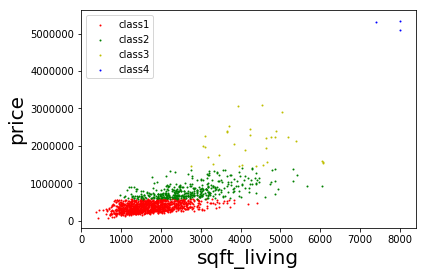

In [15]:
#教師なし分類　　目的変数

#k平均法 kMeans  center of mass　データサンプル一万以上 　目的変数なし samples with more than 10000 elements


from sklearn.cluster import KMeans 
csv_data  = pd.read_csv('house.csv')

# 1500*2 array dtype=float
train_X = np.zeros((1500,2),float) #教師データ（1500行）の説明変数を格納
train_X[:,:] = csv_data[['sqft_living','price']][0:1500]

#K平均法を用いて4クラスに分類
pred = KMeans(n_clusters=4).fit_predict(train_X)

#格クラスの要素を取得
class_1 = train_X[pred == 0]
class_2 = train_X[pred == 1]
class_3 = train_X[pred == 2]
class_4 = train_X[pred == 3]
print(pred==0)

plt.scatter(class_1[:,0], class_1[:,1], c = 'r', s=1, label = 'class1')
plt.scatter(class_2[:,0], class_2[:,1], c = 'g', s=1, label = 'class2')
plt.scatter(class_3[:, 0], class_3[:,1], c = 'y', s=1,  label = 'class3')
plt.scatter(class_4[:,0], class_4[:,1], c= 'b', s=1, label = 'class4')
plt.xlabel('sqft_living', size = 20)
plt.ylabel('price', size =20)
plt.legend()#凡例を表示
plt.show()


[False  True False ...  True False False]


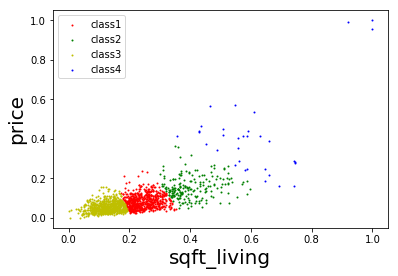

In [21]:
#正規化したversion
from sklearn.cluster import KMeans

#normalize function without for loop 
def min_max(x):
    min = np.min(x)
    max = np.max(x)
    result = (x-min)/(max-min)
    return result
# generate a vecor array to normalize
train_X = np.zeros((1500,2), float )
train_X[:,0] = min_max(csv_data['sqft_living'][0:1500])
train_X[:,1] = min_max(csv_data['price'][0:1500])



#K平均法を用いて4クラスに分類
pred = KMeans(n_clusters=4).fit_predict(train_X)

#格クラスの要素を取得
class_1 = train_X[pred == 0]
class_2 = train_X[pred == 1]
class_3 = train_X[pred == 2]
class_4 = train_X[pred == 3]
print(pred==0)

plt.scatter(class_1[:,0], class_1[:,1], c = 'r', s=1, label = 'class1')
plt.scatter(class_2[:,0], class_2[:,1], c = 'g', s=1, label = 'class2')
plt.scatter(class_3[:, 0], class_3[:,1], c = 'y', s=1,  label = 'class3')
plt.scatter(class_4[:,0], class_4[:,1], c= 'b', s=1, label = 'class4')
plt.xlabel('sqft_living', size = 20)
plt.ylabel('price', size =20)
plt.legend()#凡例を表示
plt.show()

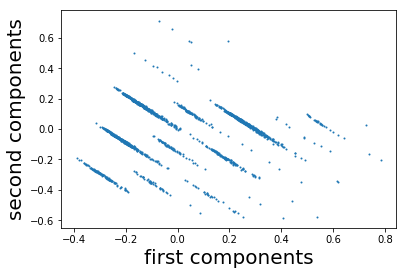

eigen vector : [[ 0.30502356  0.00217063  0.12234032 -0.32021279  0.18931101  0.86810937]
 [-0.28511149 -0.00506031 -0.15749402 -0.89987895 -0.24429174 -0.15627185]]
contribution of dimension elements[0.4818744  0.26508396]


In [47]:
#次元削減
#主成分分析 pca PRINCIPAL COMPONENT ANALYSIS
# 予測したいカテゴリーかつ値は存在しない

#多次元のデータを2次元に落とし込む
from sklearn.decomposition import PCA

#2次元のデータフレームを正規化する関数
def min_max_df(x):
    result_array = np.zeros((x.shape),float)
    #shape[1] = number of columns 
    for i in range(x.shape[1]):
        min = np.min(x.iloc[:, i])
        max= np.max(x.iloc[:,i])
        result_array[:,i] = (x.iloc[:,i]-min)/(max-min)
    return result_array

# spaces matter with strings 'a' not ' a'
csv_array = min_max_df(csv_data[['sqft_living', 'sqft_lot', 'price', 
                                'condition', 'bedrooms', 'floors']])
        
pca = PCA(n_components=2) #　何次元削減する設定

pca.fit(csv_array) # csv_array に対して主成分分析

PCA_array = pca.transform(csv_array) # 各軸を主成分とした空間に射影

components = pca.components_ #　主成分を格納

Contribution_rate = pca.explained_variance_ratio_

#plot

plt.scatter(PCA_array[:,0], PCA_array[:,1], s=1 )
plt.xlabel('first components', size= 20)
plt.ylabel('second components', size =20)
plt.show()

print('eigen vector : '+str(components))
#寄与
print('contribution of dimension elements'+str(Contribution_rate))

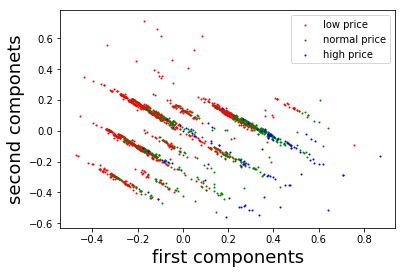

In [70]:
csv_array1 = min_max_df(csv_data[['sqft_living', 'sqft_lot', 'grade', 
                                'condition', 'bedrooms', 'floors']])

price_array1 = min_max(csv_data['price'])
pca = PCA(n_components=2)

pca.fit(csv_array1)

PCA_array = pca.transform(csv_array1)

low_price = PCA_array[price_array1 <= 0.1] 

normal_price = PCA_array[(0.1< price_array1)&(price_array1<= 0.2 )]

high_price = PCA_array[0.2 <= price_array1]


plt.scatter(low_price[:,0], low_price[:,1], s=1, c='r', label= 'low price')

plt.scatter(normal_price[:,0], normal_price[:,1], s=1, c='g', label='normal price')
plt.scatter(high_price[:,0], high_price[:,1], s=1, c='b', label='high price')
plt.legend()
plt.xlabel('first components',size= 18)
plt.ylabel('second componets', size=18)
plt.show()

In [57]:
(0.1< PCA_array[:,1])&( PCA_array[:,1]<= 0.2 )

array([ True,  True, False, ..., False, False, False])